1)	Introduction of the dataset
This dataset gathers datasets about thyroid disease from the UCI Machine Learning Repository
https://archive.ics.uci.edu/dataset/102/thyroid+disease
It is one CSV composed of different datas concerning thyroid disease. The goal here will be to analyze the data, preprocess it and use different classification methods on it to see how it will go with these differents methods. We want to classify data based on the different thyroid disease diagnoses target such as : hyperthyroidism, hypothyroidism or negative.

2)	Analysis of the dataset
The csv file contains contains 9172 observations x 31 attributes

All the attributes are :

1.	age - age of the patient (int)
2.	sex - sex patient identifies (str)
3.	on_thyroxine - whether patient is on thyroxine (bool)
4.	query on thyroxine - *whether patient is on thyroxine (bool)
5.	on antithyroid meds - whether patient is on antithyroid meds (bool)
6.	sick - whether patient is sick (bool)
7.	pregnant - whether patient is pregnant (bool)
8.	thyroid_surgery - whether patient has undergone thyroid surgery (bool)
9.	I131_treatment - whether patient is undergoing I131 treatment (bool)
10.	query_hypothyroid - whether patient believes they have hypothyroid (bool)
11.	query_hyperthyroid - whether patient believes they have hyperthyroid (bool)
12.	lithium - whether patient * lithium (bool)
13.	goitre - whether patient has goitre (bool)
14.	tumor - whether patient has tumor (bool)
15.	hypopituitary - whether patient * hyperpituitary gland (float)
16.	psych - whether patient * psych (bool)
17.	TSH_measured - whether TSH was measured in the blood (bool)
18.	TSH - TSH level in blood from lab work (float)
19.	T3_measured - whether T3 was measured in the blood (bool)
20.	T3 - T3 level in blood from lab work (float)
21.	TT4_measured - whether TT4 was measured in the blood (bool)
22.	TT4 - TT4 level in blood from lab work (float)
23.	T4U_measured - whether T4U was measured in the blood (bool)
24.	T4U - T4U level in blood from lab work (float)
25.	FTI_measured - whether FTI was measured in the blood (bool)
26.	FTI - FTI level in blood from lab work (float)
27.	TBG_measured - whether TBG was measured in the blood (bool)
28.	TBG - TBG level in blood from lab work (float)
29.	referral_source - (str)
30.	target - hyperthyroidism medical diagnosis (str)
31.	patient_id - unique id of the patient (str)

Performing classification on a dataset like this can be interesting and beneficial for several reasons:

Medical Diagnosis: The dataset contains a variety of features related to thyroid disease, including both symptoms and lab results. By training a model on this data, we can potentially create a tool that helps in diagnosing thyroid conditions based on these features.

Understanding Disease Factors: The dataset includes a wide range of attributes, from demographic information to specific medical treatments and conditions. Analyzing these can provide insights into the factors that are most predictive of thyroid disease, which can be valuable for medical research and understanding disease progression.

Predictive Modeling: The goal of classification is to predict the target variable, in this case, the type of thyroid disease. This can be particularly useful in healthcare for early detection of diseases, patient risk stratification, and personalized treatment planning.

Comparing Classification Methods: The dataset can be used to compare the performance of different classification methods. This can provide insights into which methods are most effective for this type of data and problem.



In this notebook we will be using classification algorithms to create a predictive model. This model will analyze the various features related to thyroid disease and predict the type of thyroid disease (hyperthyroidism, hypothyroidism, or negative).

The goal is to provide a tool that can assist healthcare professionals in their medical diagnosis process. It's important to note that the predictions made by the model are intended to support, not replace, the expertise of healthcare professionals in diagnosing thyroid diseases.

In [ ]:
#import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/machineL/thyroidDF.csv')

In [ ]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

We can see here the detailed columns, the data is composed of numbers (int64 and float64)and string (objects)

In [ ]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id
count,9172.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,349.000000,9.172000e+03
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057,8.529473e+08
std,1183.976718,24.184006,0.887579,37.522670,0.200360,41.551650,21.080504,7.581969e+06
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000,8.408010e+08
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000,8.504090e+08
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000,8.510040e+08
75%,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000,31.000000,8.607110e+08
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000,8.701190e+08


Because of this analysis, we can observe some probable errors in the datasets. For example it says that the max age is 65526 years old and it seems a bit too much to be real.

let's see if there are some null values

In [ ]:
data.isnull().sum()


age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

There are some but only among th hormones and sex

Now we want to check if there is duplicated data

In [ ]:
data.duplicated().sum()

0


# **Feature dropping**
there is some features that are not useful for our model, so all the XXX_measured are just boolean that confirm if a specific hormone has been measured, however if it is not measured it will be marked as null so we don't need it. And referral_source and patient_id are not useful either.

In [ ]:
data.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'
,'referral_source','patient_id'],axis=1 ,inplace=True)

In [ ]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
0,29,F,f,f,f,f,f,f,f,t,...,f,f,f,0.3,NaN,NaN,NaN,NaN,NaN,-
1,29,F,f,f,f,f,f,f,f,f,...,f,f,f,1.6,1.9,128.0,NaN,NaN,NaN,-
2,41,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,11.0,-
3,36,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,26.0,-
4,32,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0,S


Now let's change values of all age > 100 to null since there is really few chances that these values are not errors

In [ ]:
data.loc[data['age'] > 100, 'age'] = pd.NA

In [ ]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,9168.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,349.000000
mean,52.099695,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057
std,18.910296,24.184006,0.887579,37.522670,0.200360,41.551650,21.080504
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000
75%,67.000000,2.700000,2.300000,126.000000,1.065000,128.000000,31.000000
max,97.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000


In [ ]:
data['target'].values

array(['-', '-', '-', ..., 'I', '-', '-'], dtype=object)

let's see more in details the data type we can find in 'target' column

In [ ]:
print(data['target'].unique())

['-' 'S' 'F' 'AK' 'R' 'I' 'M' 'N' 'G' 'K' 'A' 'KJ' 'L' 'MK' 'Q' 'J' 'C|I'
 'O' 'LJ' 'H|K' 'D' 'GK' 'MI' 'P' 'FK' 'B' 'GI' 'C' 'GKJ' 'OI' 'D|R' 'E']


These are the values in the columns that repertory the results of diagnosis and according to the dataset description :

    hyperthyroid conditions:

    A   hyperthyroid
    B   T3 toxic
    C   toxic goitre
    D   secondary toxic

    hypothyroid conditions:

    E   hypothyroid
    F   primary hypothyroid
    G   compensated hypothyroid
    H   secondary hypothyroid


So considering these we can simplify and remap all the data so ABCD will labelled as hyperthyroid conditions and EFGH as hypothyroid conditions
As our goal is primarly to do perform classifications about thyroid disease diagnosis we will not need to remap the other entries for now.
Further, we will also change '-' to negative for more clarity

In [ ]:
mapping_dict = {'A': 'hyperthyroidism', 'B': 'hyperthyroidism', 'C': 'hyperthyroidism', 'D': 'hyperthyroidism',
                'E': 'hypothyroidism', 'F': 'hypothyroidism', 'G': 'hypothyroidism', 'H': 'hypothyroidism', '-':'negative'}

# Map the values in the 'target' column
data['target'] = data['target'].map(mapping_dict)


now let's verify target

In [ ]:
data['target'].unique()

array(['negative', nan, 'hypothyroidism', 'hyperthyroidism'], dtype=object)

In [ ]:
data = data.dropna(subset=['target'])

Let's see the occurences of each disease case in target

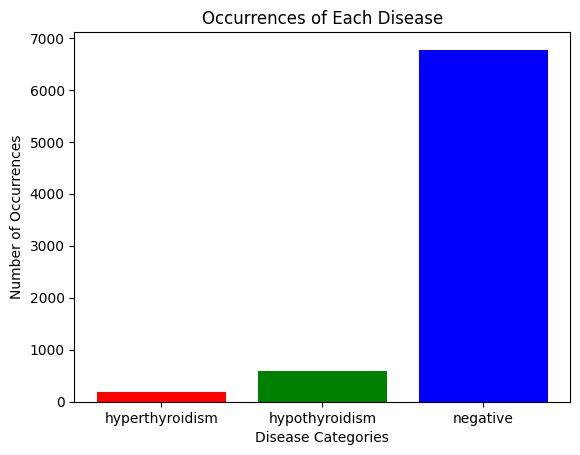

In [ ]:
import plotly.express as px

# Map the values in the 'target' column
data.loc[:, 'Diseases'] = data['target'].map(mapping_dict)

# Count the occurrences of each disease
negative_count = data['target'].value_counts()['negative']
hyperthyroidism_count = data['target'].value_counts()['hyperthyroidism']
hypothyroidism_count = data['target'].value_counts()['hypothyroidism']

# Plot a bar chart
disease_labels = ['hyperthyroidism', 'hypothyroidism', 'negative']
occurrence_counts = [hyperthyroidism_count, hypothyroidism_count, negative_count]

plt.bar(disease_labels, occurrence_counts, color=['red', 'green', 'blue'])
plt.xlabel('Disease Categories')
plt.ylabel('Number of Occurrences')
plt.title('Occurrences of Each Disease')
plt.show()

fig = px.scatter_3d(data, x='age', y='TSH', z='T3', color='target',
                    title='3D Plot of Thyroid Data', labels={'target': 'Thyroid Category'})

fig.update_traces(marker_size=4)
fig.show()


So we can see that in most of the cases the results are negative and there are much more cases where the patient suffer from hypothyroidism than hyperthyridism in this sample

And here we can see some 3d plot using different dimension reduction methods first t-SNE and second PCA

In [ ]:
import plotly.express as px
from sklearn.manifold import TSNE

# Assuming you have a DataFrame named 'data'
hormone_columns = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']

# Create a DataFrame for the selected hormones
data_hormones = data[hormone_columns + ['target']]

# Drop rows with NaN values in the selected hormones columns
data_hormones = data_hormones.dropna(subset=hormone_columns)

# Perform t-SNE to reduce dimensions to 3
tsne = TSNE(n_components=3, random_state=42)
data_tsne = tsne.fit_transform(data_hormones[hormone_columns])

# Add t-SNE components to the DataFrame
data_hormones['tsne_1'] = data_tsne[:, 0]
data_hormones['tsne_2'] = data_tsne[:, 1]
data_hormones['tsne_3'] = data_tsne[:, 2]

# Plot the 3D scatter plot with all hormones and t-SNE components
fig = px.scatter_3d(data_hormones, x='tsne_1', y='tsne_2', z='tsne_3', color='target',
                    title='3D Scatter Plot of Hormones with Target Categories (t-SNE)',
                    labels={'target': 'Thyroid Category'})

fig.update_traces(marker_size=4)
fig.show()


In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

# Assuming you have a DataFrame named 'data'
hormone_columns = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']

# Create a DataFrame for the selected hormones
data_hormones = data[hormone_columns + ['target']]

# Drop rows with NaN values in the selected hormones columns
data_hormones = data_hormones.dropna(subset=hormone_columns)

# Perform PCA to reduce dimensions to 3
pca = PCA(n_components=3, random_state=42)
data_pca = pca.fit_transform(data_hormones[hormone_columns])

# Add PCA components to the DataFrame
data_hormones['pca_1'] = data_pca[:, 0]
data_hormones['pca_2'] = data_pca[:, 1]
data_hormones['pca_3'] = data_pca[:, 2]

# Plot the 3D scatter plot with all hormones and PCA components
fig = px.scatter_3d(data_hormones, x='pca_1', y='pca_2', z='pca_3', color='target',
                    title='3D Scatter Plot of Hormones with Target Categories (PCA)',
                    labels={'target': 'Thyroid Category'})

fig.update_traces(marker_size=4)
fig.show()


t-SNE seems to reduct more the data even though they the same number of component for reduction

Now that know that, let's represent the various hormones level when the patient is either negative, suffer from hypothyroidism or hyperthyroidoism

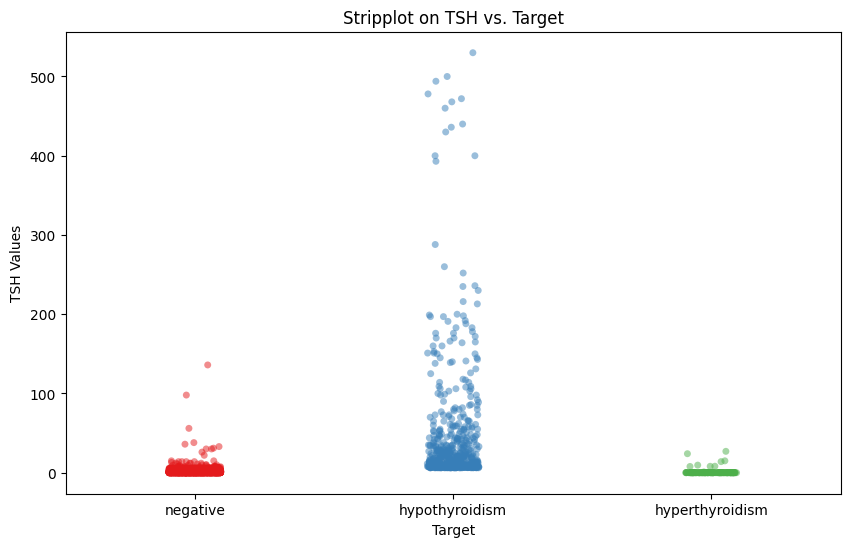

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add seaborn.stripplot
plt.figure(figsize=(10, 6))
sns.stripplot(x='target', y='TSH', data=data, jitter=True, hue='target', alpha=0.5, palette='Set1')
plt.xlabel('Target')
plt.ylabel('TSH Values')
plt.title('Stripplot on TSH vs. Target')
plt.show()


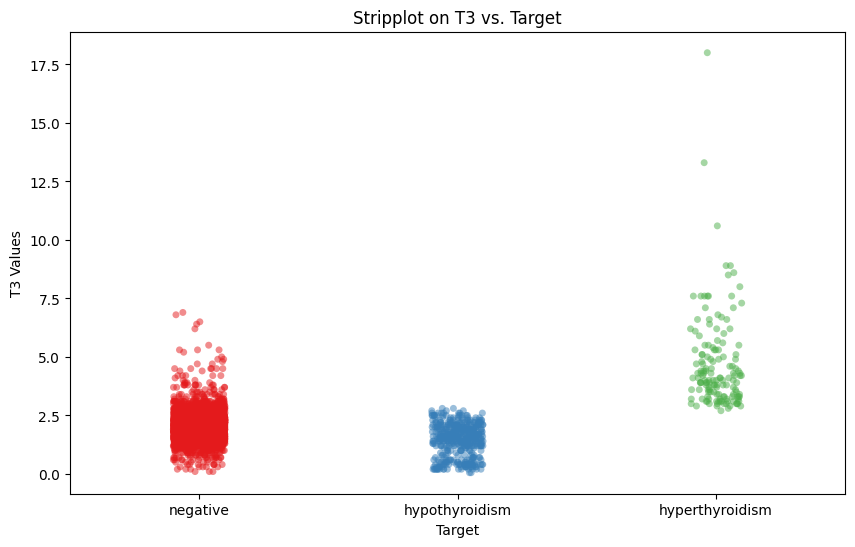

In [ ]:
# Add seaborn.stripplot
plt.figure(figsize=(10, 6))
sns.stripplot(x='target', y='T3', data=data, jitter=True, hue='target', alpha=0.5, palette='Set1')
plt.xlabel('Target')
plt.ylabel('T3 Values')
plt.title('Stripplot on T3 vs. Target')
plt.show()


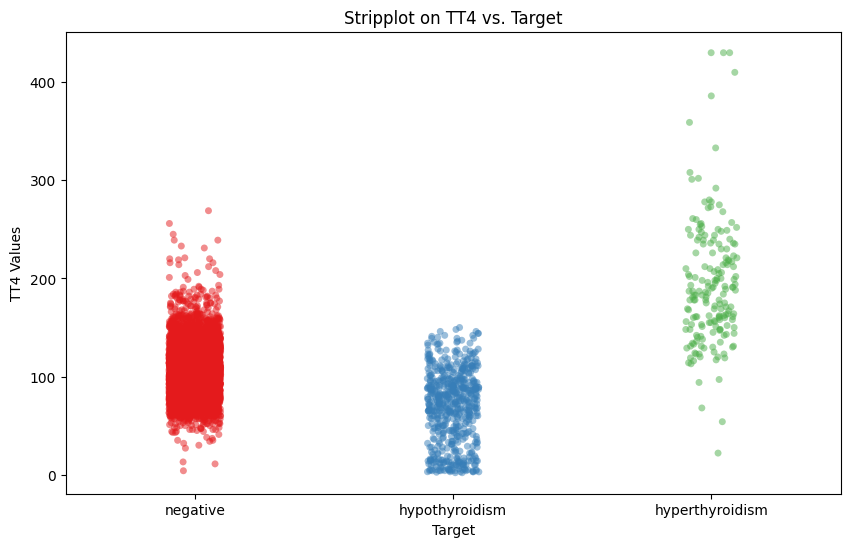

In [ ]:
# Add seaborn.stripplot
plt.figure(figsize=(10, 6))
sns.stripplot(x='target', y='TT4', data=data, jitter=True, hue='target', alpha=0.5, palette='Set1')
plt.xlabel('Target')
plt.ylabel('TT4 Values')
plt.title('Stripplot on TT4 vs. Target')
plt.show()


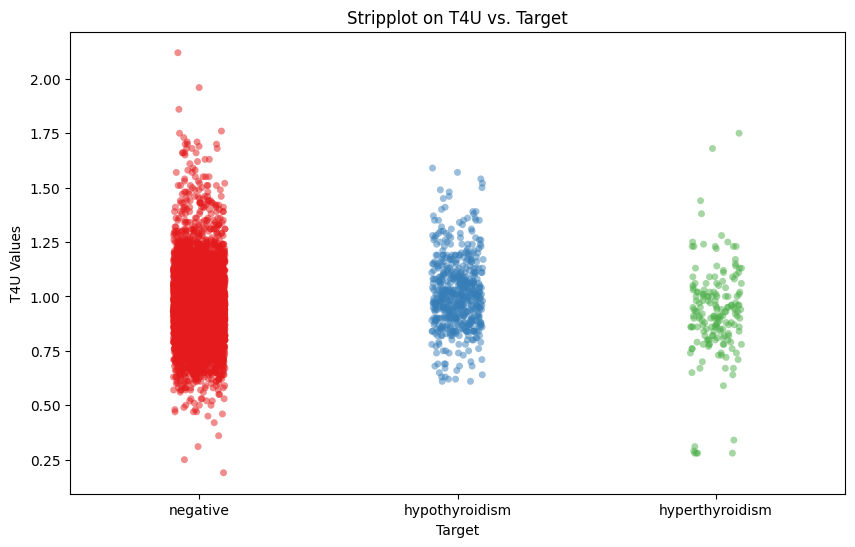

In [ ]:
# Add seaborn.stripplot
plt.figure(figsize=(10, 6))
sns.stripplot(x='target', y='T4U', data=data, jitter=True, hue='target', alpha=0.5, palette='Set1')
plt.xlabel('Target')
plt.ylabel('T4U Values')
plt.title('Stripplot on T4U vs. Target')
plt.show()


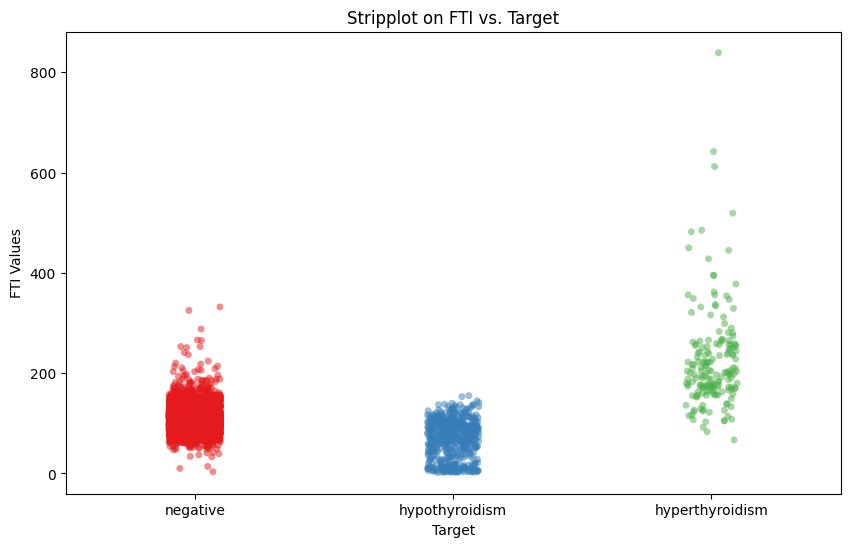

In [ ]:
# Add seaborn.stripplot
plt.figure(figsize=(10, 6))
sns.stripplot(x='target', y='FTI', data=data, jitter=True, alpha=0.5, hue='target', palette='Set1')
plt.xlabel('Target')
plt.ylabel('FTI Values')
plt.title('Stripplot on FTI vs. Target')
plt.show()


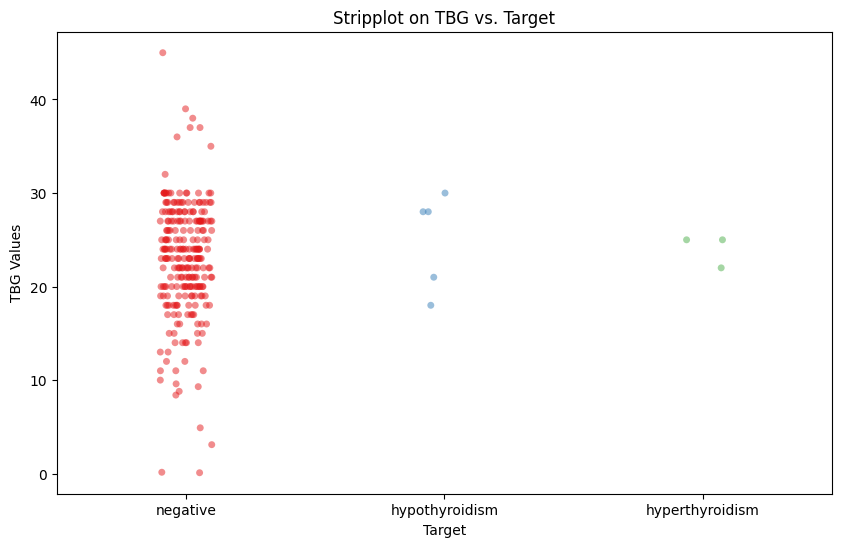

In [ ]:
# Add seaborn.stripplot
plt.figure(figsize=(10, 6))
sns.stripplot(x='target', y='TBG', data=data, jitter=True, hue='target', alpha=0.5, palette='Set1')
plt.xlabel('Target')
plt.ylabel('TBG Values')
plt.title('Stripplot on TBG vs. Target')
plt.show()


We can observe that TSH, T3, TT4 and FTI are really interesting classes to understand the diagnosis of a patient. The other values are either too much similar or there not enough values of them available.

However now we will probably need to be careful about the outliers. For example usually TSH normal values are 0.5 between to 5.0 mIU/L for negative patient (source : ULCA)
But as we can see there are clearly some aberrant values

And we can also show on a 3d plot the relation between three main hormones level and the thyroid diagnosis

In [ ]:
import plotly.express as px

# Assuming you have a DataFrame named 'data'
hormone_columns = ['TSH', 'T3', 'TT4']

# Create a DataFrame for the selected hormones
data_hormones = data[hormone_columns + ['target']]

# Drop rows with NaN values in the selected hormones columns
data_hormones = data_hormones.dropna(subset=hormone_columns)

# Plot the 3D scatter plot with all hormones
fig = px.scatter_3d(data_hormones, x='TSH', y='T3', z='TT4', color='target',
                    title='3D Scatter Plot of Hormones with Target Categories',
                    labels={'target': 'Thyroid Category'})

fig.update_traces(marker_size=4)
fig.show()


So we confirm again that high TT4 and TSH is representative of hyperthyroidism while high level of t3 is associated with hypothyroidism

In [ ]:
data.sex.unique()

array(['F', 'M', nan], dtype=object)

We can see there is indeed missing values in 'sex' column

In [ ]:
data['sex'].isna().sum()


250

In [ ]:

data['sex'].value_counts()

F    4900
M    2396
Name: sex, dtype: int64

In [ ]:
data['sex'].isna().sum()/(data['sex'].isna().sum() + data['sex'].value_counts().get('F', 0) + data['sex'].value_counts().get('M', 0)) * 100

3.3130135170951496

The percentage of nan values for 'sex' category is less than 5% so we could actually drop these values without impacting too much the evaluation

Now let's create a plot of the numerical values

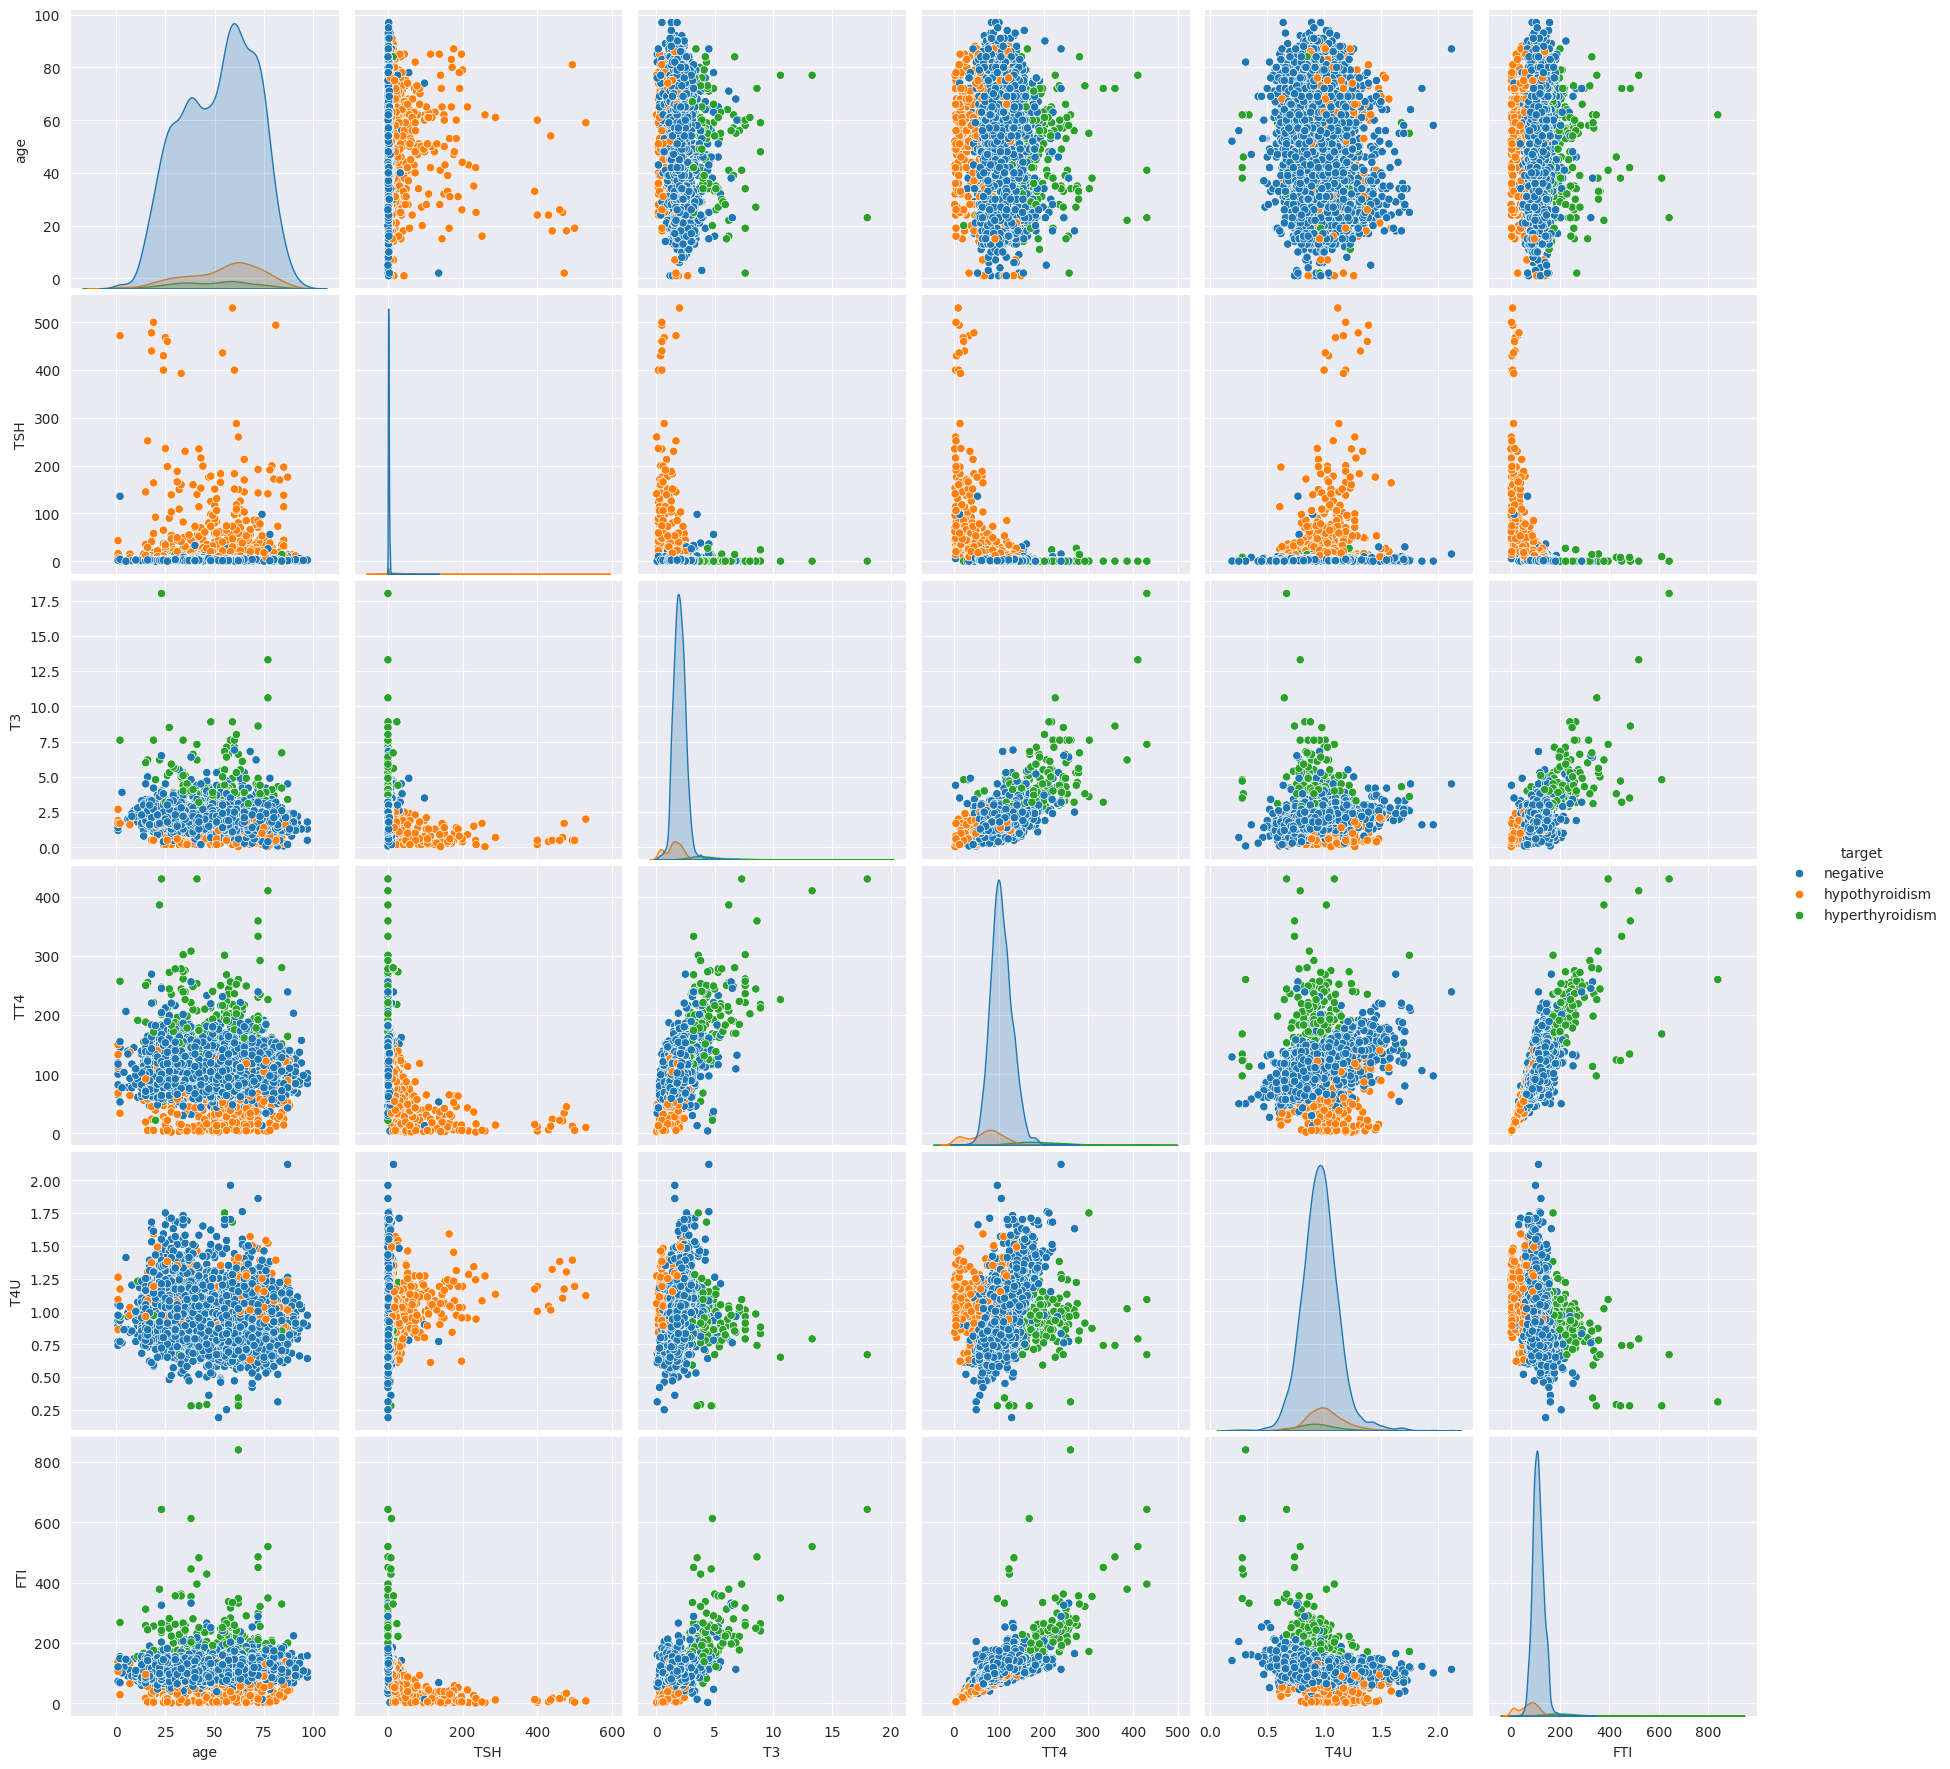

In [ ]:
numericalDF = data[['age', 'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'target']].copy()
sns.set_style('darkgrid');
sns.pairplot(numericalDF, hue='target', height=3);
plt.show()

In [ ]:
columns_with_missing_values = data.columns[data.isnull().any()].tolist()

# Calculate and print percentage of missing values for each column
for column in columns_with_missing_values:
    missing_percentage = data[column].isna().mean() * 100
    print(f"Percentage of missing values for {column}: {missing_percentage:.2f}%")

Percentage of missing values for age: 0.05%
Percentage of missing values for sex: 3.31%
Percentage of missing values for TSH: 9.57%
Percentage of missing values for T3: 29.27%
Percentage of missing values for TT4: 4.69%
Percentage of missing values for T4U: 8.96%
Percentage of missing values for FTI: 8.87%
Percentage of missing values for TBG: 96.57%
Percentage of missing values for Diseases: 100.00%


Diseases was just for a previous plot so we are going to drop it and we can see that pretty much all the values of TBG are missing so we are also dropping this column

In [ ]:
data = data.drop('TBG', axis=1)

In [ ]:
data = data.drop('Diseases', axis=1)

In [ ]:
data['sex'] = np.where((data.sex.isnull()) & (data.pregnant == 't'), 'F', data.sex)

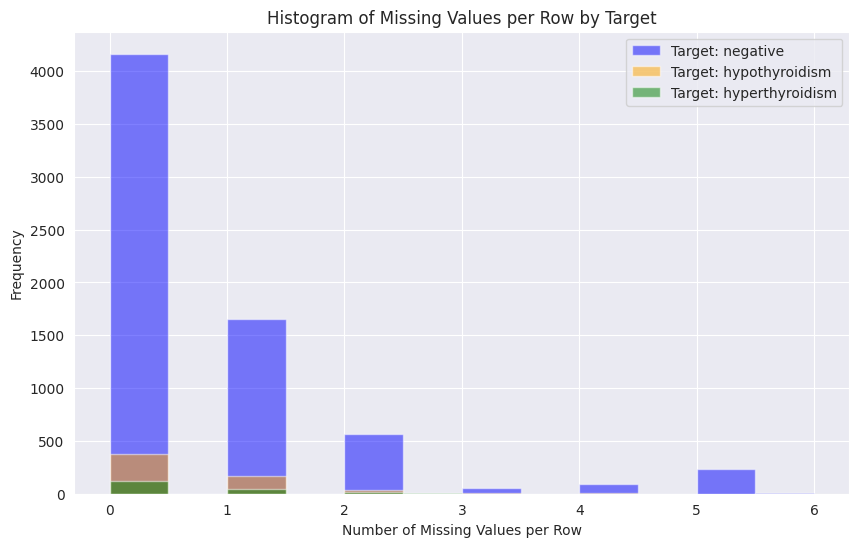

In [ ]:
# Calculate the number of missing values per row
data['n_missing'] = data.isnull().sum(axis=1)

# Create a histogram with legends using matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram with different colors for 'target'
for target_value, color in zip(data['target'].unique(), ['blue', 'orange', 'green']):
    subset_data = data[data['target'] == target_value]
    ax.hist(subset_data['n_missing'], bins=int((subset_data['n_missing'].max() - subset_data['n_missing'].min()) / 0.5),
            alpha=0.5, color=color, label=f'Target: {target_value}')

# Add legends and plot
ax.legend()
plt.xlabel('Number of Missing Values per Row')
plt.ylabel('Frequency')
plt.title('Histogram of Missing Values per Row by Target')
plt.show()

So now that we dropped TBH most of the missing values are gone and the only that stays are >= 2. So from 3 and more the columns could be dropped

In [ ]:
data.drop(data.index[data['n_missing'] >= 3], inplace=True)

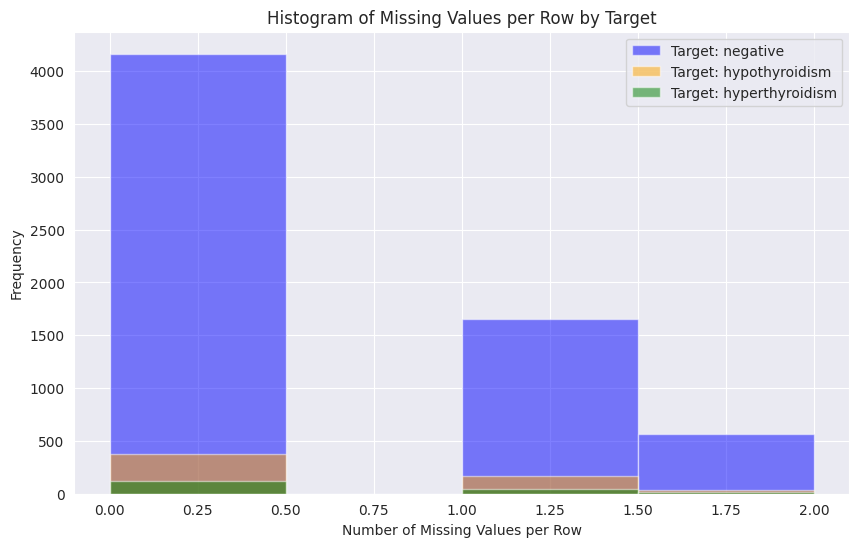

In [ ]:
# Calculate the number of missing values per row
data['n_missing'] = data.isnull().sum(axis=1)

# Create a histogram with legends using matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram with different colors for 'target'
for target_value, color in zip(data['target'].unique(), ['blue', 'orange', 'green']):
    subset_data = data[data['target'] == target_value]
    ax.hist(subset_data['n_missing'], bins=int((subset_data['n_missing'].max() - subset_data['n_missing'].min()) / 0.5),
            alpha=0.5, color=color, label=f'Target: {target_value}')

# Add legends and plot
ax.legend()
plt.xlabel('Number of Missing Values per Row')
plt.ylabel('Frequency')
plt.title('Histogram of Missing Values per Row by Target')
plt.show()

Overall Missingness Percentage: 1.89%


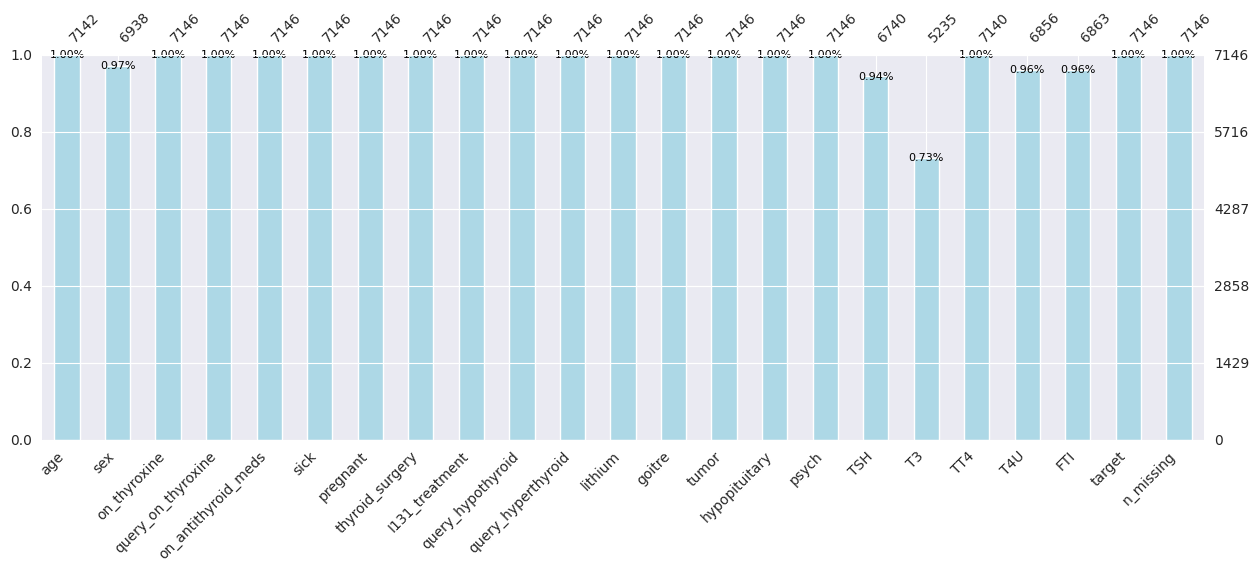

In [ ]:
# Calculate the overall missingness percentage
overall_missing_percentage = (data.isnull().sum().sum() / (data.shape[0] * data.shape[1])) * 100

# Display the overall missingness percentage
print(f"Overall Missingness Percentage: {overall_missing_percentage:.2f}%")

# Plot the bar chart of missing values with the percentage total
msno_bar = msno.bar(data, color='lightblue', figsize=(15, 5), fontsize=10)

# Add the percentage total to the bar chart
for p in msno_bar.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    msno_bar.annotate(f'{height:.2f}%', (x + width/2, y + height), ha='center', va='center', fontsize=8, color='black')

# Display the plots
plt.show()

Now we need to evaluate the dataset et we are going to do it using 2 classification methods (KNN and  HistGradientBoosting), with and without preprocessing according to the needs of each model


#KNN
K-Nearest Neighbors (KNN) is a simple yet powerful algorithm that can work well on a variety of datasets. Here are some potential advantages of using KNN on this dataset:

Easy to understand and implement :  The logic behind KNN is straightforward: it classifies a data point based on the classes of its nearest neighbors. This makes it easy to understand and implement.

Robust to noisy data : If the dataset has a lot of noise (i.e., irrelevant or incorrect data), which is the case, KNN can often still perform well, especially if you use a larger number of neighbors.

However, it's important to note that KNN can be sensitive to irrelevant features and the scale of the data. This is why feature selection and scaling  are important preprocessing steps when using KNN. Also, KNN can be computationally expensive and slow to predict on large datasets, as it needs to compute the distance between the test sample and each training sample.

#Random Forest vs HistGradientBoosting

Random Forest could be a great choice and its actually common to use in healthcare field. It handles high dimensionality and missing values among other qualities. It was originally my second choice, however a boosting algorythm such as HistGradientBoosting could have few advantages agains Random Forest including :    

HistGradientBoostingClassifier is a boosting model, which means it builds trees in a sequential manner, each one learning from the mistakes of the previous one. This can often lead to better performance than RandomForestClassifier, which is a bagging model that builds each tree independently.

It can automatically handle categorical variables without the need for one-hot encoding. This can simplify preprocessing and potentially improve performance when dealing with high-cardinality categorical features.

Both models can handle missing values, but HistGradientBoostingClassifier uses a more sophisticated method (based on gradient boosting decision trees) that can sometimes provide better results. and while RandomForest doesn handle NaN, HistGradientBoosting does.

HistGradientBoostingClassifier includes options for regularization (like l2_regularization), which can help prevent overfitting and improve model performance.

HistGradientBoostingClassifier uses histogram-based methods for binning continuous features, which can be faster and use less memory than the traditional method used by RandomForestClassifier.



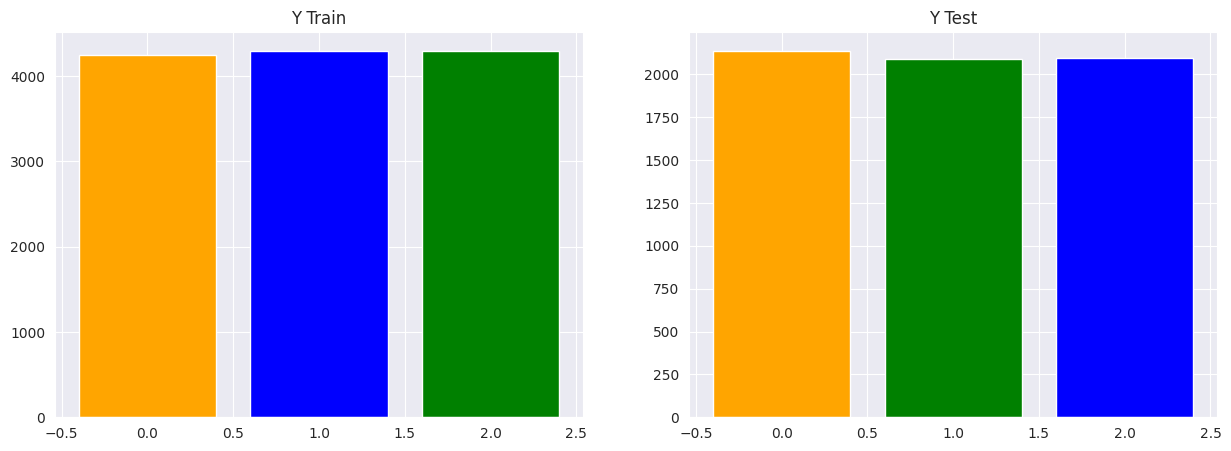

In [64]:


from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

columns = ['age', 'TT4', 'T3', 'T4U', 'FTI', 'TSH', 'target']
model_data = data.loc[:, columns]

# Map target labels to numerical values
target_to_num = {
    'negative': 0,
    'hypothyroidism': 1,
    'hyperthyroidism': 2,
}
model_data['target'] = model_data['target'].map(target_to_num)

# Separate features (x) and target variable (y)
x = model_data.iloc[:, :-1]
y = model_data.iloc[:, -1]

# Oversample the minority classes using RandomOverSampler
ros = RandomOverSampler(random_state=89)
x_resampled, y_resampled = ros.fit_resample(x, y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.33, random_state=89)

# Plot the count of target classes in training and testing sets
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Training set
axs[0].bar(Counter(y_train).keys(), Counter(y_train).values(), color=['blue', 'orange', 'green'])
axs[0].set_title('Y Train')

# Testing set
axs[1].bar(Counter(y_test).keys(), Counter(y_test).values(), color=['blue', 'orange', 'green'])
axs[1].set_title('Y Test')

plt.show()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12841, 6)
(12841,)
(6326, 6)
(6326,)


In [ ]:
x_train[:10]

,age,TT4,T3,T4U,FTI,TSH
8249,75.0,90.0,1.6,0.89,101.0,10.000
3449,27.0,119.0,2.3,0.99,120.0,1.800
10770,50.0,55.0,NaN,0.93,60.0,34.000
6099,32.0,64.0,NaN,0.76,84.0,NaN
10155,37.0,68.0,NaN,0.62,111.0,12.000
6577,50.0,116.0,2.4,0.97,120.0,1.800
3079,41.0,138.0,4.4,0.64,218.0,0.025
13947,39.0,131.0,4.1,0.95,138.0,0.105
4266,69.0,123.0,NaN,0.91,136.0,1.400
560,24.0,119.0,NaN,1.17,102.0,NaN


# KNN Training

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import linear_model, svm, neighbors, neural_network
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

x_train = x_train.fillna(x_train.mean())
x_test = x_test.fillna(x_test.mean())

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Define the models
knn = KNeighborsClassifier()





In [67]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12841, 6)
(12841,)
(6326, 6)
(6326,)


In [68]:
mean_acc = np.zeros(30)
for i in range(1,31):
    #Train Model and Predict
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat= knn.predict(x_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.99193803, 0.99130572, 0.98197913, 0.97960797, 0.9729687 ,
       0.97249447, 0.96506481, 0.96221941, 0.9558963 , 0.95510591,
       0.94846665, 0.94498893, 0.94008852, 0.9416693 , 0.9388239 ,
       0.93487196, 0.93265887, 0.93155232, 0.928865  , 0.92823269,
       0.92649383, 0.9260196 , 0.92127727, 0.91985457, 0.91811571,
       0.91353146, 0.9117926 , 0.91210876, 0.91131837, 0.9075245 ])

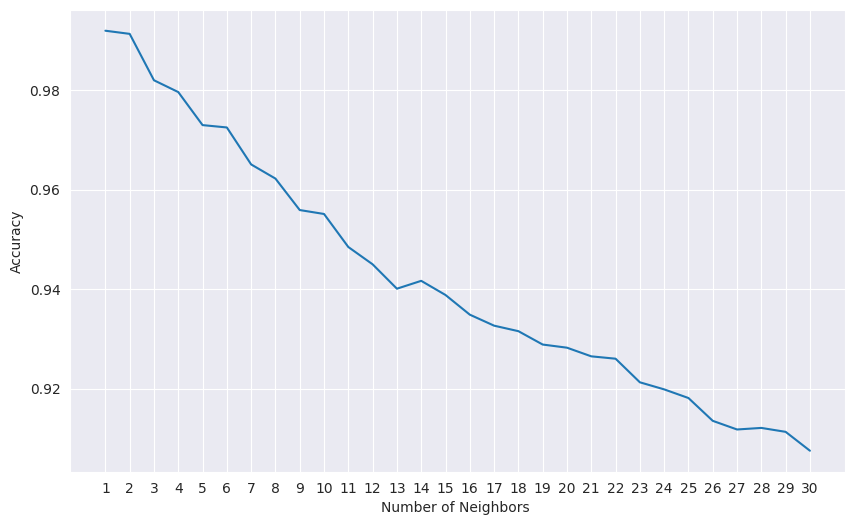

In [69]:
loc = np.arange(1,31,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,31), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [70]:
# Define the hyperparameters
param_grid = {
    'n_neighbors' : [1,2,3,4,5,6],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}


In [71]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [72]:
gs = GridSearchCV(neighbors.KNeighborsClassifier(), param_grid, verbose = 1, cv=3, n_jobs = -1)

In [73]:
g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [74]:
g_res.best_score_

0.986683243572083

In [75]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

In [76]:
knn = KNeighborsClassifier(n_neighbors = 1, weights = 'uniform',metric = 'manhattan')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [77]:
# get a prediction
y_hat = knn.predict(x_train)
y_knn = knn.predict(x_test)

# KNN Testing

In [78]:
print('Training set accuracy: ', accuracy_score(y_train, y_hat))
print('Test set accuracy: ',accuracy_score(y_test, y_knn))

Training set accuracy:  1.0
Test set accuracy:  0.9927284223838129


The K-Nearest Neighbors (KNN) model with parameters n_neighbors=1, weights='uniform', and metric='manhattan' has achieved an accuracy score of 0.99. This is a high score, suggesting that the model is performing very well on the data.

Thus, here are some conclusions we can draw:

Efficacy: The model is highly effective, correctly predicting the target variable 99% of the time on the given dataset.

Relevance: Given its high accuracy, KNN seems to be a relevant choice for this specific dataset. The chosen parameters are working well.

However, we need to keep in mind the following:

Overfitting: With n_neighbors=1, the model might be overfitting to the training data. Overfitting happens when the model learns the training data too well, including its noise. This can lead to poor performance on unseen data. It would be beneficial to test the model on a validation set or use cross-validation to ensure it generalizes well.

Uniform weights: This means all neighbors are given equal weight. If the data has outliers, they can have a significant impact on the prediction. If this is the case, you might want to try weights='distance', which weights points by the inverse of their distance.

Manhattan distance (L1 norm): This metric can work well if the input variables are not similar in type (e.g., age, income, etc.). If the input variables are similar in type, Euclidean distance might be more appropriate.



While accuracy is a useful metric, it doesn't always provide a complete picture of a model's performance, especially in cases of imbalanced classes. This is where additional metrics like precision, recall, and the F1 score come in. Here's why they're also importantto take into consideration:

Precision: This is the ratio of correctly predicted positive observations to the total predicted positives. High precision relates to the low false positive rate. It is a good measure to determine when the costs of false positives are high.

Recall (Sensitivity): This is the ratio of correctly predicted positive observations to all actual positives. It is a good measure to determine when the costs of false negatives are high.

F1 Score: This is the weighted average of precision and recall. It tries to find the balance between precision and recall. It is a good measure when you need to take both precision and recall into account.

By using these metrics in addition to accuracy, you can get a more comprehensive understanding of our model's performance. For example, a model might have high accuracy but low precision, which means it has a high number of false positives. Or a model might have high accuracy but low recall, which means it has a high number of false negatives. The F1 score can help balance these considerations.




In [79]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_knn))

[[2093   32   14]
 [   0 2091    0]
 [   0    0 2096]]


In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2139
           1       0.98      1.00      0.99      2091
           2       0.99      1.00      1.00      2096

    accuracy                           0.99      6326
   macro avg       0.99      0.99      0.99      6326
weighted avg       0.99      0.99      0.99      6326




So in our case, all these metrics are close to 1, indicating that our model is performing exceptionally well in all aspects.

However, as we said previously such a high accuracy with only 1 neighbor could also be the signe of an overfit of the model so let's do some verifications to be sure that its not the case

Cross-validation: This technique partitions the dataset into a number of subsets, and the KNN model is trained and tested multiple times, each time training on a different combination of the subsets and testing on the remaining subset. The average score from all iterations is then used. This helps to ensure that the model's performance is consistent across different subsets of the data.

In [81]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='manhattan')
scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)

print("Cross-validation scores: ", scores)
print("Average cross-validation score: ", scores.mean())

Cross-validation scores:  [0.98559751 0.9805296  0.98442368 0.98714953 0.98364486]
Average cross-validation score:  0.9842690344619347


Hold-out validation set: Besides the training and testing sets, we can set aside a portion of our data (say, 20%) as a validation set. This set is not used during the training phase and serves to check the model's performance on unseen data.

In [82]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=89)

# Train the model on the training set
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='manhattan')
knn.fit(x_train, y_train)

# Check the model's performance on the validation set
y_val_pred = knn.predict(x_val)
print("Validation set accuracy: ", metrics.accuracy_score(y_val, y_val_pred))

Validation set accuracy:  0.9871545348384585


In [ ]:
print('X_train_scaled:', X_train_scaled.shape)
print('y_train:', y_train.shape)

X_train_scaled: (12841, 6)
y_train: (3657,)


Given these results, it seems less likely that the model is overfitting, despite the low n_neighbors value. It appears to be a robust and effective model for the specific dataset and problem.

Now lets try for HistGraidient

In [54]:
from sklearn.ensemble import HistGradientBoostingClassifier


gradientClassifier = HistGradientBoostingClassifier()

In [55]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

mean_acc = np.zeros(500)
for i in range(1,501):
    #Train Model and Predict
    hgbc = HistGradientBoostingClassifier(max_iter = i).fit(x_train,y_train)
    yhat= hgbc.predict(x_test)
    mean_acc[i-1] = accuracy_score(y_test, yhat)

mean_acc

array([0.98846032, 0.98893456, 0.98735378, 0.99177996, 0.99272842,
       0.99320266, 0.99383497, 0.99320266, 0.99367689, 0.99351881,
       0.99415112, 0.99336073, 0.99272842, 0.99415112, 0.99525767,
       0.99446728, 0.99494151, 0.99494151, 0.99541574, 0.99462536,
       0.99557382, 0.99557382, 0.99525767, 0.99494151, 0.99446728,
       0.99525767, 0.99509959, 0.99541574, 0.99494151, 0.99462536,
       0.99557382, 0.99541574, 0.9957319 , 0.99541574, 0.99604806,
       0.99588998, 0.99462536, 0.99557382, 0.99509959, 0.99668037,
       0.99588998, 0.99541574, 0.99557382, 0.99620613, 0.99588998,
       0.99525767, 0.99557382, 0.9957319 , 0.99636421, 0.99652229,
       0.99604806, 0.99588998, 0.99620613, 0.9957319 , 0.99541574,
       0.9957319 , 0.99541574, 0.99604806, 0.99620613, 0.99636421,
       0.99541574, 0.99588998, 0.99652229, 0.99604806, 0.99525767,
       0.99604806, 0.99509959, 0.99604806, 0.99652229, 0.99636421,
       0.99636421, 0.99620613, 0.99557382, 0.99620613, 0.99494

Highest value: 0.9969965222889662
Index of highest value: 252


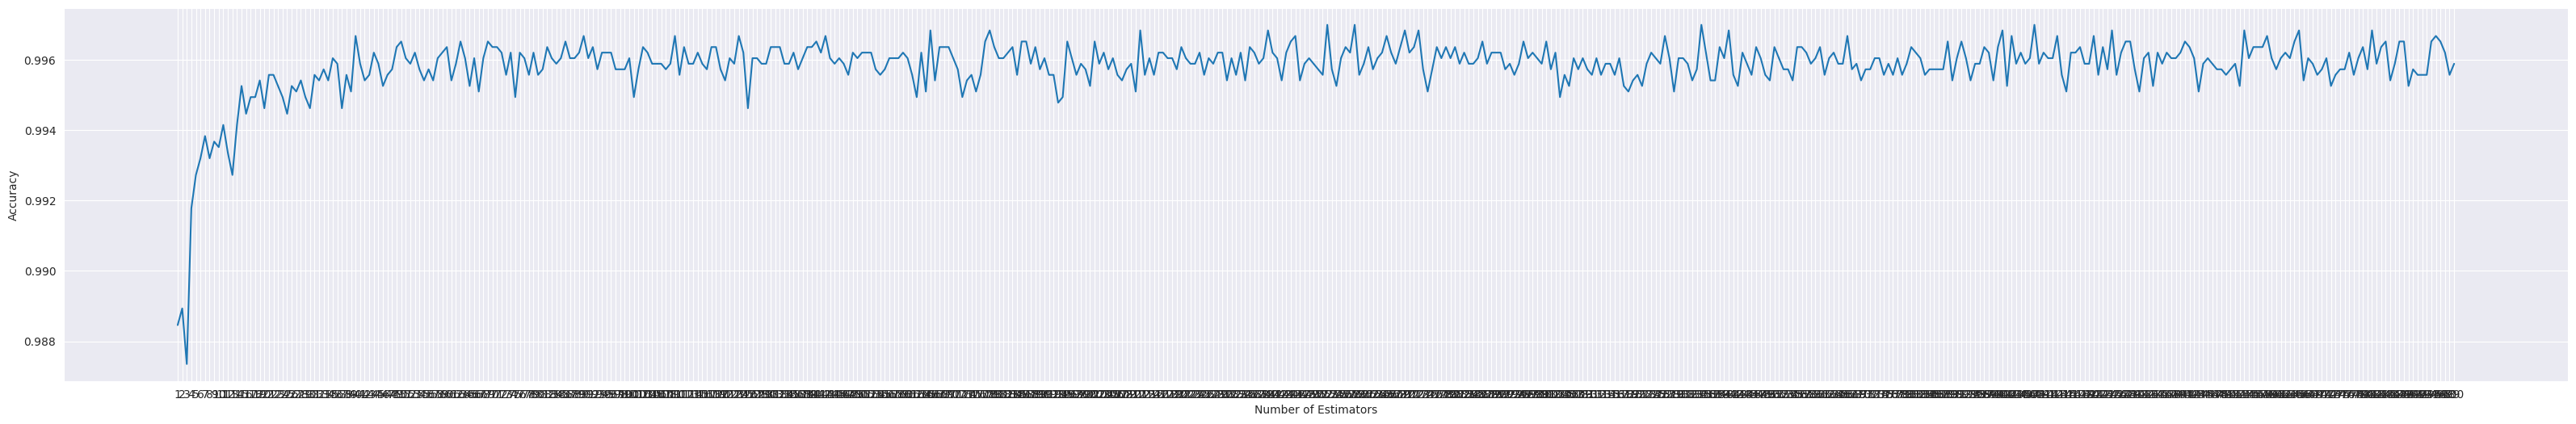

In [56]:
import numpy as np
import matplotlib.pyplot as plt

highest_value = np.max(mean_acc)
highest_index = np.argmax(mean_acc)
print("Highest value:", highest_value)
print("Index of highest value:", highest_index)

loc = np.arange(1, 501, step=1.0)
plt.figure(figsize=(40, 6))
plt.plot(range(1, 501), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.show()


In [59]:
HistGradient = HistGradientBoostingClassifier(max_iter = 252)
HistGradient.fit(x_train, y_train)

HistGradientBoostingClassifier(max_iter=252)

In [60]:
# get a prediction
y_hat = HistGradient.predict(x_train)
y_HistGradient = HistGradient.predict(x_test)

In [61]:
print('Training set accuracy: ', accuracy_score(y_train, y_hat))
print('Test set accuracy: ',accuracy_score(y_test, y_HistGradient))

Training set accuracy:  0.9996884977805467
Test set accuracy:  0.9962061334176415


In [62]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_HistGradient))

[[2115    9   15]
 [   0 2091    0]
 [   0    0 2096]]


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_HistGradient))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2139
           1       1.00      1.00      1.00      2091
           2       0.99      1.00      1.00      2096

    accuracy                           1.00      6326
   macro avg       1.00      1.00      1.00      6326
weighted avg       1.00      1.00      1.00      6326



HistGradient did a nearly perfect job to classify these data because of two things : its nature of gradient boosting model plus the fact that it handles really well outliers, missing values NaN and inconsistencies. And even if we did a lot of preprocessing, in order to perform a good classification we either have the choice to use a basic classifier like KNN who doesn't handle NaN by fill these nan values by calculating means of other values or you can use this type of model directly

The HistGradientBoostingClassifier performed exceptionally well on this dataset, achieving near-perfect classification accuracy. This can be attributed to several key characteristics of the model. Firstly, as a gradient boosting model, it builds trees in a sequential manner, each one learning from the mistakes of the previous one, which often leads to superior performance. Secondly, it handles outliers, missing values, and inconsistencies effectively, which is crucial for real-world data that often comes with such issues.

While preprocessing steps like handling missing values are important, the choice of the classifier also plays a significant role in the model's performance. For instance, simpler classifiers like KNN require explicit handling of missing values, such as filling them with the mean of other values. However, more sophisticated models like HistGradientBoostingClassifier can handle these issues directly, often leading to better performance and less preprocessing effort.

In conclusion, the choice of the classifier should be guided by the nature of the dataset and the specific requirements of the task. In this case, HistGradientBoostingClassifier proved to be an excellent choice for the task of thyroid disease classification.



Based on the results we've obtain, it appears that our primary objective of creating predictive tools to assist with medical diagnoses has been successfully achieved. Both models are showing high accuracy and excellent precision, recall, and f1-scores on the test set, which suggests it should perform well when making predictions on new, unseen data.